In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

def read_data_from_csv(path):
    """Load datasets from CSV files.
    Args:
        path (str): Path to the CSV file.
    Returns:
        X (np.ndarray): Features of samples.
    """
    assert os.path.exists(path), f'File not found: {path}!'
    assert os.path.splitext(path)[-1] == '.csv', f'Unsupported file type {os.path.splitext(path)[-1]}!'

    data = pd.read_csv(path)
    X = data.values
    return X

# Load the data
X_public = read_data_from_csv('assignment_4_public.csv')

# Standardize the data
scaler = StandardScaler()
X_public = scaler.fit_transform(X_public)

print(X_public)


[[ 0.         -0.04836104 -0.04286133 ... -0.17299065 -0.09181827
  -0.02215628]
 [ 0.         -0.04836104 -0.04286133 ... -0.17299065 -0.09181827
  -0.02215628]
 [ 0.         -0.04836104 -0.04286133 ... -0.17299065 -0.09181827
  -0.02215628]
 ...
 [ 0.         -0.04836104 -0.04286133 ... -0.17299065 -0.09181827
  -0.02215628]
 [ 0.         -0.04836104 -0.04286133 ... -0.17299065 -0.09181827
  -0.02215628]
 [ 0.         -0.04836104 -0.04286133 ... -0.17299065 -0.09181827
  -0.02215628]]


In [15]:
n_clusters = 5  # You need to determine the optimal number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
agg_labels = agg_clustering.fit_predict(X_public)


In [2]:
from sklearn.metrics import silhouette_score

best_silhouette_score = -1
best_n_clusters = 2  # Start with a minimum of 2 clusters

for n_clusters in range(2, 11):  # Try different numbers of clusters
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    agg_labels = agg_clustering.fit_predict(X_public)
    silhouette_avg = silhouette_score(X_public, agg_labels)
    
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_n_clusters = n_clusters

print("Optimal number of clusters:", best_n_clusters)


/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid

Optimal number of clusters: 3


/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [18]:
n_clusters = 3

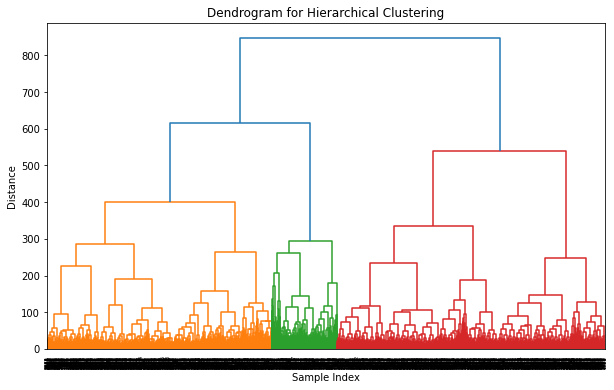

In [19]:
# Perform hierarchical clustering
linked = linkage(X_public, 'ward')  # it can experiment with different linkage methods

# Create a dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [6]:
# Perform hierarchical clustering with the optimal number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward')
preds = agg_clustering.fit_predict(X_public)


In [4]:
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering with different numbers of clusters
best_n_clusters = 3  # Replace with the determined optimal number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward')
agg_labels = agg_clustering.fit_predict(X_public)

# Evaluate the clustering using Davies-Bouldin Index, Dunn Index, and Silhouette Coefficient
davies_bouldin = davies_bouldin_score(X_public, agg_labels)
silhouette_avg = silhouette_score(X_public, agg_labels)

print("Davies-Bouldin Index:", davies_bouldin)
print("Silhouette Coefficient:", silhouette_avg)


Davies-Bouldin Index: 2.090390941263207
Silhouette Coefficient: 0.1665366389797547


/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [32]:

# Perform hierarchical clustering with the optimal number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='complete')
preds = agg_clustering.fit_predict(X_public)

In [33]:
# Perform hierarchical clustering with different numbers of clusters
best_n_clusters = 3  # Replace with the determined optimal number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='complete')
agg_labels = agg_clustering.fit_predict(X_public)

# Evaluate the clustering using Davies-Bouldin Index, Dunn Index, and Silhouette Coefficient
davies_bouldin = davies_bouldin_score(X_public, agg_labels)
silhouette_avg = silhouette_score(X_public, agg_labels)

print("Davies-Bouldin Index:", davies_bouldin)
print("Silhouette Coefficient:", silhouette_avg)

Davies-Bouldin Index: 1.327355363531961
Silhouette Coefficient: 0.4271859006911431


/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [34]:
# Perform hierarchical clustering with different numbers of clusters
best_n_clusters = 3  # Replace with the determined optimal number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='average')
agg_labels = agg_clustering.fit_predict(X_public)

# Evaluate the clustering using Davies-Bouldin Index, Dunn Index, and Silhouette Coefficient
davies_bouldin = davies_bouldin_score(X_public, agg_labels)
silhouette_avg = silhouette_score(X_public, agg_labels)

print("Davies-Bouldin Index:", davies_bouldin)
print("Silhouette Coefficient:", silhouette_avg)

Davies-Bouldin Index: 0.23134909296592285
Silhouette Coefficient: 0.6661107920453977


/Users/mgl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [7]:
submission = pd.DataFrame({'Label': preds})
submission.to_csv('assignment_4.csv', index=True, index_label='Id')


In [39]:
import os
import pandas as pd
import numpy as np
from PIL import Image

# Load the CSV data
data = pd.read_csv('assignment_4_public.csv')

# Select the first row as an example
image_data = data.iloc[0].values

# Reshape the data to match the image dimensions (28x28 pixels)
image_size = 28
image_data = image_data.reshape(image_size, image_size)

# Normalize pixel values (assuming they are in the range 0-255)
image_data = image_data / 255.0

# Create and save the image
output_directory = 'output_images'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

image = Image.fromarray((image_data * 255).astype('uint8'), mode='L')
image.save(os.path.join(output_directory, 'example_image.png'))

print('Saved the example image to', os.path.join(output_directory, 'example_image.png'))


Saved the example image to output_images/example_image.png


In [38]:
import os
import pandas as pd
import numpy as np
from PIL import Image

# Load the CSV data
data = pd.read_csv('assignment_4_public.csv')

# Select the first row as an example
image_data = data.iloc[11].values

# Reshape the data to match the image dimensions (28x28 pixels)
image_size = 28
image_data = image_data.reshape(image_size, image_size)

# Normalize pixel values (assuming they are in the range 0-255)
image_data = image_data / 255.0

# Create and save the image
output_directory = 'output_images'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

image = Image.fromarray((image_data * 255).astype('uint8'), mode='L')
image.save(os.path.join(output_directory, 'example_image.png'))

print('Saved the example image to', os.path.join(output_directory, 'example_image1.png'))


Saved the example image to output_images/example_image.png


In [40]:
import os
import pandas as pd
import numpy as np
from PIL import Image

# Load the CSV data
data = pd.read_csv('assignment_4_public.csv')

# Select the first row as an example
image_data = data.iloc[1].values

# Reshape the data to match the image dimensions (28x28 pixels)
image_size = 28
image_data = image_data.reshape(image_size, image_size)

# Normalize pixel values (assuming they are in the range 0-255)
image_data = image_data / 255.0

# Create and save the image
output_directory = 'output_images'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

image = Image.fromarray((image_data * 255).astype('uint8'), mode='L')
image.save(os.path.join(output_directory, 'example_image.png'))

print('Saved the example image to', os.path.join(output_directory, 'example_image2.png'))


Saved the example image to output_images/example_image2.png


In [8]:
import os
import pandas as pd
import numpy as np
from PIL import Image

# Load the CSV data
data = pd.read_csv('assignment_4_public.csv')

# Select the first row as an example
image_data = data.iloc[2].values

# Reshape the data to match the image dimensions (28x28 pixels)
image_size = 28
image_data = image_data.reshape(image_size, image_size)

# Normalize pixel values (assuming they are in the range 0-255)
image_data = image_data / 255.0

# Create and save the image
output_directory = 'output_images'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

image = Image.fromarray((image_data * 255).astype('uint8'), mode='L')
image.save(os.path.join(output_directory, 'example_image3.png'))

print('Saved the example image to', os.path.join(output_directory, 'example_image3.png'))


Saved the example image to output_images/example_image3.png


In [10]:
import os
import pandas as pd
import numpy as np
from PIL import Image

# Load the CSV data
data = pd.read_csv('assignment_4_public.csv')

# Select the first row as an example
image_data = data.iloc[4].values

# Reshape the data to match the image dimensions (28x28 pixels)
image_size = 28
image_data = image_data.reshape(image_size, image_size)

# Normalize pixel values (assuming they are in the range 0-255)
image_data = image_data / 255.0

# Create and save the image
output_directory = 'output_images'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

image = Image.fromarray((image_data * 255).astype('uint8'), mode='L')
image.save(os.path.join(output_directory, 'example_image4.png'))

print('Saved the example image to', os.path.join(output_directory, 'example_image4.png'))


Saved the example image to output_images/example_image5.png
